In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def euclidian_distance(x, y, a, b):
    return mth.sqrt(pow(x - a,2) + pow(y - b,2))

In [3]:
def assign_cluster(dataset, Centroids):
    cluster = []
    
    for k in range(len(Centroids)):
        euc = []
        for i in range(len(dataset)):
            euc_dis = euclidian_distance(dataset.loc[i, 'x'], dataset.loc[i, 'y'], Centroids.loc[k, 'x'], Centroids.loc[k, 'y'])
            euc.append(euc_dis)
            if(k ==0):
                cluster.append(1)
            else:
                for j in range(k):
                    if(euc_dis < euclidian_distance(dataset.loc[i, 'x'], dataset.loc[i, 'y'], Centroids.loc[j, 'x'], Centroids.loc[j, 'y'])):
                        cluster[i] = k + 1
            
        eucname = 'Euc'+ str(k + 1)
        dataset[eucname] = euc
    dataset['Cluster'] = cluster
                
    return dataset

In [26]:
def calc_new_centroid(dataset):
    mean = pd.DataFrame({'Meanx' :[0,0], 'Meany' :[0,0], 'Num' :[1,1]})
    
    for i in range(len(dataset)):
        if(dataset.loc[i, 'Cluster'] == 1):
            mean.loc[0,'Meanx'] = mean.loc[0,'Meanx'] + dataset.loc[i, 'x']
            mean.loc[0,'Meany'] = mean.loc[0,'Meany'] + dataset.loc[i, 'y']
            mean.loc[0,'Num']=  mean.loc[0,'Num'] + 1
        else:
            mean.loc[1,'Meanx'] += dataset.loc[i, 'x']
            mean.loc[1,'Meany'] += dataset.loc[i, 'y']
            mean.loc[1,'Num']+=1

    mean.loc[0,'Meanx']/=  mean.loc[0,'Num']
    mean.loc[0,'Meany']/=  mean.loc[0,'Num']

    mean.loc[1,'Meanx']/=  mean.loc[1,'Num']
    mean.loc[1,'Meany']/=  mean.loc[1,'Num']

   
    return (round(mean.loc[0,'Meanx'], 2), round(mean.loc[0,'Meany'],2), round(mean.loc[1,'Meanx'],2),round(mean.loc[0,'Meany'],2))

    

In [33]:
def do_cluster(dataset):
    current = pd.DataFrame({'x': [dataset['x'][0],  dataset['x'][1]], 'y': [dataset['y'][0], dataset['y'][1]]})

    data = assign_cluster(dataset, Centroids)
    Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
    newCents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
    
    while (current['x'][0] != Cents['x'][0]):
        data = assign_cluster(data, newCents)
        Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
        current = newCents
        newCents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
        for i in range(len(data)):
            if(data['Cluster'][i] == 1):
                plt.plot(data['x'][i], data['y'][i], 'o', color='pink')
            else:
                 plt.plot(data['x'][i], data['y'][i], 'o', color='purple')
                
            
        
        plt.plot(current['x'][0], current['y'][0], 'v', color='pink')
        plt.plot(current['x'][1], current['y'][1], 'v', color='purple')
        
        

    return 0

,x,y
0,5,3
1,10,15
2,15,12
3,24,10
4,30,45
5,55,52
6,60,78
7,71,80
8,80,91
9,85,70


0

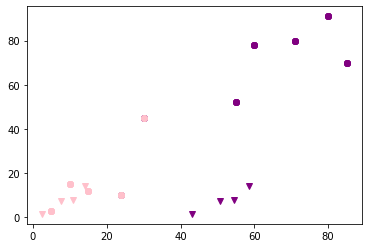

In [34]:
data = pd.DataFrame({'x' :[5, 10, 15, 24, 30, 55, 60, 71, 80, 85], 'y' : [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]})
data.head(10)
do_cluster(data)

In [17]:
Centroids = pd.DataFrame({'x': [data['x'][0],  data['x'][1]], 'y': [data['y'][0], data['y'][1]]})

print(assign_cluster(data, Centroids))

    x   y        Euc1        Euc2  Cluster
0   5   3    0.000000   13.000000        1
1  10  15   13.000000    0.000000        2
2  15  12   13.453624    5.830952        2
3  24  10   20.248457   14.866069        2
4  30  45   48.877398   36.055513        2
5  55  52   70.007142   58.258047        2
6  60  78   93.005376   80.430094        2
7  71  80  101.414989   89.140339        2
8  80  91  115.624392  103.324731        2
9  85  70  104.350371   93.005376        2


In [18]:
data = assign_cluster(data, Centroids)

Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))


2.5 1.5 43.0 1.5
    x   y        Euc1       Euc2  Cluster
0   5   3    2.915476  38.029594        1
1  10  15   15.443445  35.654593        1
2  15  12   16.324828  29.904013        1
3  24  10   23.119256  20.814658        2
4  30  45   51.463579  45.400991        2
5  55  52   72.845727  51.906165        2
6  60  78   95.700052  78.366128        2
7  71  80  104.184932  83.344166        2
8  80  91  118.391300  96.846528        2
9  85  70  107.231059  80.350793        2


In [19]:
data = assign_cluster(data, Cents)
Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))

7.5 7.5 50.62 7.5
    x   y        Euc1       Euc2  Cluster
0   5   3    5.147815  45.841405        1
1  10  15    7.905694  41.306590        1
2  15  12    8.746428  35.903125        1
3  24  10   16.688319  26.737135        1
4  30  45   43.732139  42.795261        2
5  55  52   65.088401  44.715036        2
6  60  78   87.900512  71.121265        2
7  71  80   96.376864  75.309989        2
8  80  91  110.582548  88.517989        2
9  85  70   99.561539  71.331861        2


In [20]:
data = assign_cluster(data, Cents)
Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))

10.8 8.0 54.43 8.0
    x   y        Euc1       Euc2  Cluster
0   5   3    7.657676  49.682239        1
1  10  15    7.045566  44.978049        1
2  15  12    5.800000  39.632372        1
3  24  10   13.350655  30.495654        1
4  30  45   41.685009  44.337624        1
5  55  52   62.366978  44.003692        2
6  60  78   85.560739  70.221257        2
7  71  80   93.851159  73.882101        2
8  80  91  108.063130  86.849438        2
9  85  70   96.693536  69.126875        2


In [21]:
data = assign_cluster(data, Cents)
Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))

14.0 14.17 58.5 14.17
    x   y        Euc1       Euc2  Cluster
0   5   3   14.344647  54.653627        1
1  10  15    4.085205  48.507102        1
2  15  12    2.389330  43.554092        1
3  24  10   10.834616  34.751099        1
4  30  45   34.734549  41.984984        1
5  55  52   55.786279  37.991564        2
6  60  78   78.678262  63.847623        2
7  71  80   87.078062  67.006260        2
8  80  91  101.285976  79.781570        2
9  85  70   90.321586  61.799991        2


In [22]:
data = assign_cluster(data, Cents)
Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))

14.0 14.17 58.5 14.17
    x   y        Euc1       Euc2  Cluster
0   5   3   14.344647  54.653627        1
1  10  15    4.085205  48.507102        1
2  15  12    2.389330  43.554092        1
3  24  10   10.834616  34.751099        1
4  30  45   34.734549  41.984984        1
5  55  52   55.786279  37.991564        2
6  60  78   78.678262  63.847623        2
7  71  80   87.078062  67.006260        2
8  80  91  101.285976  79.781570        2
9  85  70   90.321586  61.799991        2


In [23]:
data = assign_cluster(data, Cents)
Cent1X, Cent1Y, Cent2X, Cent2Y = calc_new_centroid(data)
Cents = pd.DataFrame({'x': [Cent1X,  Cent2X], 'y': [Cent1Y, Cent2Y]})
print(assign_cluster(data, Cents))

14.0 14.17 58.5 14.17
    x   y        Euc1       Euc2  Cluster
0   5   3   14.344647  54.653627        1
1  10  15    4.085205  48.507102        1
2  15  12    2.389330  43.554092        1
3  24  10   10.834616  34.751099        1
4  30  45   34.734549  41.984984        1
5  55  52   55.786279  37.991564        2
6  60  78   78.678262  63.847623        2
7  71  80   87.078062  67.006260        2
8  80  91  101.285976  79.781570        2
9  85  70   90.321586  61.799991        2
